# This is the Analysis of the First Part

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import chardet

with open("AMI_GSE66360_series_matrix.csv", "rb") as f:
    result = chardet.detect(f.read(100000))  # Read first 100,000 bytes
    print(result) 



{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [3]:
ROWS_TO_SKIP = 59
FILE_PATH = 'AMI_GSE66360_series_matrix.csv'

raw_df = pd.read_csv(FILE_PATH, skiprows=ROWS_TO_SKIP,  encoding=result['encoding'], header=None)
GENE_AXIS = 0
SAMPLE_AXIS = 1
raw_df.head()

C:\Users\wmata\AppData\Local\Temp\ipykernel_26216\3213269223.py:4: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv(FILE_PATH, skiprows=ROWS_TO_SKIP,  encoding=result['encoding'], header=None)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,Class,H,H,H,H,H,H,H,H,H,...,M,M,M,M,M,M,M,M,M,M
1,ID_REF,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
2,1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
3,1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
4,117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813


In [4]:
df = raw_df.copy()
df.columns = raw_df.iloc[1]
df.drop(df.index[1], inplace=True)
df.head()


1,ID_REF,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
0,Class,H,H,H,H,H,H,H,H,H,...,M,M,M,M,M,M,M,M,M,M
2,1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
3,1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
4,117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813
5,121_at,6.179477974,6.58288903,6.602134766,6.545904723,5.911542321,6.28542026,6.562315839,6.345887555,6.27280582,...,6.513436777,6.317522639,7.413453376,6.809103167,5.949091368,6.440978114,6.955883278,6.499215058,6.587065112,6.897590966


In [5]:
df.set_index(['ID_REF'], inplace=True)
df.head()


1,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,GSM1620828,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
ID_REF,,,,,,,,,,,,,,,,,,,,,
Class,H,H,H,H,H,H,H,H,H,H,...,M,M,M,M,M,M,M,M,M,M
1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,6.016415473,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,7.580840863,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,6.307065808,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813
121_at,6.179477974,6.58288903,6.602134766,6.545904723,5.911542321,6.28542026,6.562315839,6.345887555,6.27280582,5.971847425,...,6.513436777,6.317522639,7.413453376,6.809103167,5.949091368,6.440978114,6.955883278,6.499215058,6.587065112,6.897590966


In [6]:
labels = df.loc['Class'].copy()
df.drop(index=['Class'], inplace=True)
df.head()   


1,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,GSM1620828,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,6.016415473,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,7.580840863,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,6.307065808,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813
121_at,6.179477974,6.58288903,6.602134766,6.545904723,5.911542321,6.28542026,6.562315839,6.345887555,6.27280582,5.971847425,...,6.513436777,6.317522639,7.413453376,6.809103167,5.949091368,6.440978114,6.955883278,6.499215058,6.587065112,6.897590966
1255_g_at,2.792047952,2.69571445,2.580181122,2.712123845,2.723686912,2.70668403,2.674746672,2.635149735,2.696649177,2.802862883,...,2.924657514,2.714103313,3.635944854,2.710943641,2.979380765,3.73013912,2.914867562,3.013901455,2.729319786,3.151449425


In [7]:
labels.head()

1
GSM1620819    H
GSM1620820    H
GSM1620821    H
GSM1620822    H
GSM1620823    H
Name: Class, dtype: object

##### a. High level description of the data and some pre-processing

1) How many genes profiled?


In [8]:
num_genes = df.shape[GENE_AXIS]
print(f"There are {num_genes} genes profiled in the dataset.")

There are 54675 genes profiled in the dataset.


2) How many samples (subjects/patients) in total?


In [9]:
subject = df.shape[SAMPLE_AXIS]
print(f"There are {subject} subjects profiled in the dataset.")

There are 99 subjects profiled in the dataset.


3) How many samples in each class?


In [10]:
healthy_samples = (labels == "H")
disease_samples = (labels == "M")  # Assuming "D" is the other class

print(f"Healthy samples: {healthy_samples.sum()}")
print(f"Disease samples: {disease_samples.sum()}")

Healthy samples: 50
Disease samples: 49


4) If there are missing values, then remove the entire row
(gene) from the data matrix.
How many rows left now?

In [11]:
cleaned_df = df.apply(pd.to_numeric, errors='coerce')
cleaned_df = cleaned_df.dropna(axis=GENE_AXIS)
print(f"There are {cleaned_df.shape[GENE_AXIS]} genes left after removing genes with missing values.")

There are 54628 genes left after removing genes with missing values.


In [12]:
cleaned_df.head()

1,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,GSM1620828,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,5.866378,4.948736,5.148384,5.064419,5.017833,5.116154,5.431328,5.235271,5.773528,6.016415,...,5.419482,5.057716,5.996493,5.343133,5.558892,6.472517,5.678816,5.653286,6.013841,5.465334
1053_at,8.225790,7.525865,7.764637,7.198461,7.831450,7.203592,7.694551,7.760259,8.279814,7.580841,...,7.226348,7.105538,5.354105,8.271500,5.963346,8.261422,6.925753,7.918424,7.442701,9.225221
117_at,6.179732,6.628137,5.859151,5.974135,6.793079,6.435229,6.320546,6.483590,6.387779,6.307066,...,6.789501,7.441940,7.026929,6.003973,7.474326,6.367759,6.835756,7.577035,7.147417,6.481128
121_at,6.179478,6.582889,6.602135,6.545905,5.911542,6.285420,6.562316,6.345888,6.272806,5.971847,...,6.513437,6.317523,7.413453,6.809103,5.949091,6.440978,6.955883,6.499215,6.587065,6.897591
1255_g_at,2.792048,2.695714,2.580181,2.712124,2.723687,2.706684,2.674747,2.635150,2.696649,2.802863,...,2.924658,2.714103,3.635945,2.710944,2.979381,3.730139,2.914868,3.013901,2.729320,3.151449


5) Pick 20 genes at random. Draw histograms comparing
expression levels of each of these genes in the two
classes M and H.

In [13]:
selected_genes = cleaned_df.sample(20, axis=GENE_AXIS).index
selected_genes


Index(['1553086_at', '216186_at', '230652_at', '239337_at', '1561595_x_at',
       '244033_at', '218203_at', '223274_at', '205411_at', '244678_at',
       '230718_at', '1561726_s_at', '1555830_s_at', '204614_at', '230174_at',
       '223429_x_at', '1570009_at', '211689_s_at', '218317_x_at',
       '211517_s_at'],
      dtype='object', name='ID_REF')

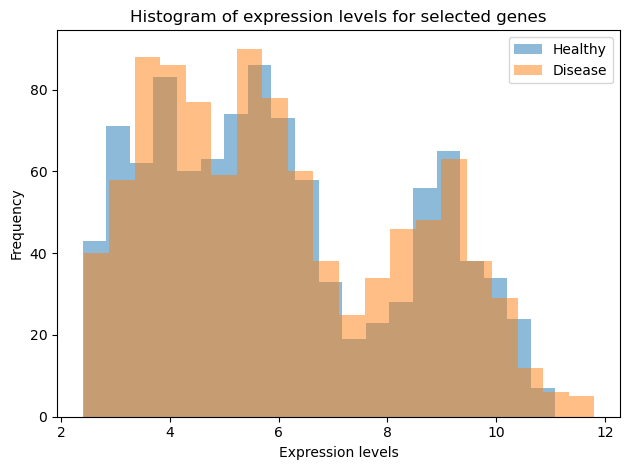

In [14]:
np.random.seed(0)
SAMPLE_AMOUNT = 20
selected_genes = cleaned_df.sample(SAMPLE_AMOUNT, axis=GENE_AXIS).index


df_healthy = cleaned_df.loc[selected_genes, healthy_samples].values.flatten()
df_disease = cleaned_df.loc[selected_genes, disease_samples].values.flatten()

plt.hist(df_healthy, bins=20, alpha=0.5, label='Healthy')
plt.hist(df_disease, bins=20, alpha=0.5, label='Disease')
plt.legend(loc='upper right')
plt.xlabel('Expression levels')
plt.ylabel('Frequency')
plt.title('Histogram of expression levels for selected genes')



plt.tight_layout()
plt.show()

##### b. WRS for differential expression (DE)


1) Consider some gene, g. Under the null model (which assumes that
for g there is no M vs H DE), what is the expected sum of ranks of
g’s expression levels measured for samples labeled M?


In [15]:
sampeled_gene = cleaned_df.sample(1, axis=GENE_AXIS).index[0]
sampeled_gene_ranks = cleaned_df.loc[sampeled_gene].rank()
disease_sum_of_ranks = sampeled_gene_ranks[disease_samples].sum()

print(f"Sum of ranks for the disease samples: {disease_sum_of_ranks}")

Sum of ranks for the disease samples: 2649.0


2) Denote this sum of ranks by RS(g). What is the minimal value, m,
that RS(g) can take?


In [16]:
num_of_disease_samples = disease_samples.sum()
minimal_RS_disease = (1 + num_of_disease_samples) * num_of_disease_samples / 2
print(f"Minimal possible sum of ranks for the disease samples: {minimal_RS_disease}")


Minimal possible sum of ranks for the disease samples: 1225.0


3) Under the null model, what is the probability of RS(g) = m?
(provide a formula for this and explain it)


__Answer:__

There is only one combination of labels that gives the minimal RS(g) value. It is given only when **all** samples labled 'M' are occupyinhg the lowest ranks. Given N samples, $N_M$ of them are labeled as 'M', there are $\binom{N}{N_M}$ placements that are possible. Assuming every rank has the same probability to be labeled as either 'M' or 'H', the chance of getting the minimum RS(g) placement is $\frac{1}{\binom{N}{N_M}}$.

In [17]:
import math
num_of_samples = cleaned_df.shape[SAMPLE_AXIS]
prob_for_minimal_RS = 1 / (math.comb((num_of_samples), (num_of_disease_samples)))
print(f"Probability of getting the minimal sum of ranks: {prob_for_minimal_RS}")

Probability of getting the minimal sum of ranks: 1.9823306042836678e-29


4) Under the null model, what is the probability of RS(g) = m+1? what
is the probability of RS(g) = m+2?
(provide formulas and explain them)


__Answer:__

The only label-placement that acheived 𝑅𝑆(𝑔) = 𝑚 + 1, is the same placement that achieves RS(g) = m, only replacing the largest labeled rank (i.e. $N_M$) by the next rank ($N_M + 1$). Any other replacement of the labels will increase the sum of ranks by more than 1. Therefore, again the chance under the Null Hypothesis for getting this RS(g) is $\frac{1}{\binom{N}{N_M}}$.

To increase this sum of ranks by 2, we can either replace the highest rank (i.e. $N_M$) with $N_M + 2$, or alternitavely, we can replace the second largest labeld rank ($N_M - 1$)  with the next unlabled rank ($N_M + 1$). 2 possible label placements have **double** the probability: 
$ \frac{2}{\binom{N}{N_M}}$.


In [18]:
# Look at the code cell above, it's kinda the same :) 

5) Draw a histogram of the values of RS(g) in the dataset. Here g
ranges over all genes in the data (after the clean-up)

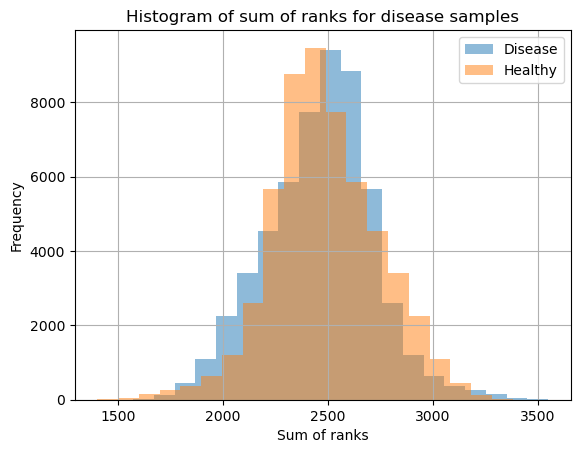

In [19]:
disease_sum_of_ranks_per_gene = pd.Series(index=cleaned_df.index, dtype=float)
healthy_sum_of_ranks_per_gene = pd.Series(index=cleaned_df.index, dtype=float)
for gene in cleaned_df.index:
    gene_ranks = cleaned_df.loc[gene].rank()
    disease_sum_of_ranks_per_gene[gene] = gene_ranks[disease_samples].sum()
    healthy_sum_of_ranks_per_gene[gene] = gene_ranks[healthy_samples].sum()

disease_sum_of_ranks_per_gene.hist(bins=20, alpha=0.5)
healthy_sum_of_ranks_per_gene.hist(bins=20, alpha=0.5)
plt.xlabel('Sum of ranks')
plt.ylabel('Frequency')
plt.title('Histogram of sum of ranks for disease samples')
plt.legend(['Disease', 'Healthy'])
plt.show()
    

c. Differential Expression
The purpose is to determine the statistical significance of
differential expression (DE) observed for each gene in H vs M.
Evaluate the DE in both one-sided directions for every gene,
using both Student t-test and WRS test. Report the number of genes overexpressed in M vs H at a p-value
better (≤) than 0.05 and separately genes underexpressed in M
vs H at a p-value of 0.05. For both directions use both a Student ttest
and a WRS test.

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu

def student_t_test(gene):
    disease_values = cleaned_df.loc[gene, disease_samples]
    healthy_values = cleaned_df.loc[gene, healthy_samples]
    t_stat_ttest, p_value_two_tailed_ttest = ttest_ind(disease_values, healthy_values, equal_var=False)
    _, p_wilcoxon_disease_greater = mannwhitneyu(disease_values, healthy_values, alternative='greater')
    _, p_wilcoxon_healthy_greater = mannwhitneyu(disease_values, healthy_values, alternative='less')
    
    # convert p_value into one-way value.
    p_val_disease_greater_ttest = p_value_two_tailed_ttest / 2 if t_stat_ttest > 0 else 1
    p_val_healthy_greater_ttest = p_value_two_tailed_ttest / 2 if t_stat_ttest < 0 else 1

    return{ "p_ttest_disease_greater": p_val_disease_greater_ttest,
            "p_ttest_healthy_greater": p_val_healthy_greater_ttest,
            'p_wilcoxon_disease_greater': p_wilcoxon_disease_greater,
            'p_wilcoxon_healthy_greater': p_wilcoxon_healthy_greater
            }


p_values = pd.DataFrame(index=cleaned_df.index, columns=['p_ttest_disease_greater', 'p_ttest_healthy_greater', 'p_wilcoxon_disease_greater', 'p_wilcoxon_healthy_greater'])
for gene in cleaned_df.index: 
    p_values.loc[gene] = student_t_test(gene)

p_values.head()



In [ ]:
genes_overexpressed_in_disease_wilcoxon = p_values[p_values['p_wilcoxon_disease_greater'] < 0.05].index
genes_overexpressed_in_disease_ttest = p_values[p_values['p_ttest_disease_greater'] < 0.05].index
genes_underexpressed_in_disease_wilcoxon = p_values[p_values['p_wilcoxon_healthy_greater'] < 0.05].index
genes_underexpressed_in_disease_ttest = p_values[p_values['p_ttest_healthy_greater'] < 0.05].index

print(f"Genes that were overexpressed in disease samples: ")
print(f"Wilcoxon test: {len(genes_overexpressed_in_disease_wilcoxon)}")
print(f"Student t-test: {len(genes_overexpressed_in_disease_ttest)}")

print(f"Genes that were underexpressed in disease samples: ")
print(f"Wilcoxon test: {len(genes_underexpressed_in_disease_wilcoxon)}")
print(f"Student t-test: {len(genes_underexpressed_in_disease_ttest)}")

Genes that were overexpressed in disease samples: 
Wilcoxon test: 9010
Student t-test: 7035
Genes that were underexpressed in disease samples: 
Wilcoxon test: 9474
Student t-test: 7454


d. Correlations
Select the 60 most significant genes from each one of the onesided
WRS DE lists you computed in 3c. Generate a set of 120
genes, D, which is the union of the above two sets.


In [ ]:
most_significant_genes_overexpressed = p_values.loc[genes_overexpressed_in_disease_wilcoxon].sort_values(by='p_wilcoxon_disease_greater').index[:60]
most_significant_genes_underexpressed = p_values.loc[genes_underexpressed_in_disease_wilcoxon].sort_values(by='p_wilcoxon_healthy_greater').index[:60]
D_most_significant_genes = most_significant_genes_overexpressed.union(most_significant_genes_underexpressed, sort=False)
D_most_significant_genes

Index(['208869_s_at', '216248_s_at', '204622_x_at', '244054_at', '203887_s_at',
       '203888_at', '217202_s_at', '203574_at', '241279_at', '240103_at',
       ...
       '1562697_at', '236265_at', '227877_at', '219494_at', '213317_at',
       '1560147_at', '219532_at', '223671_x_at', '239862_at', '241582_at'],
      dtype='object', name='ID_REF', length=120)

1) Compute Spearman rho correlations in all pairs within D (120
choose 2 numbers). Represent the correlation matrix as a 120x120
heatmap.


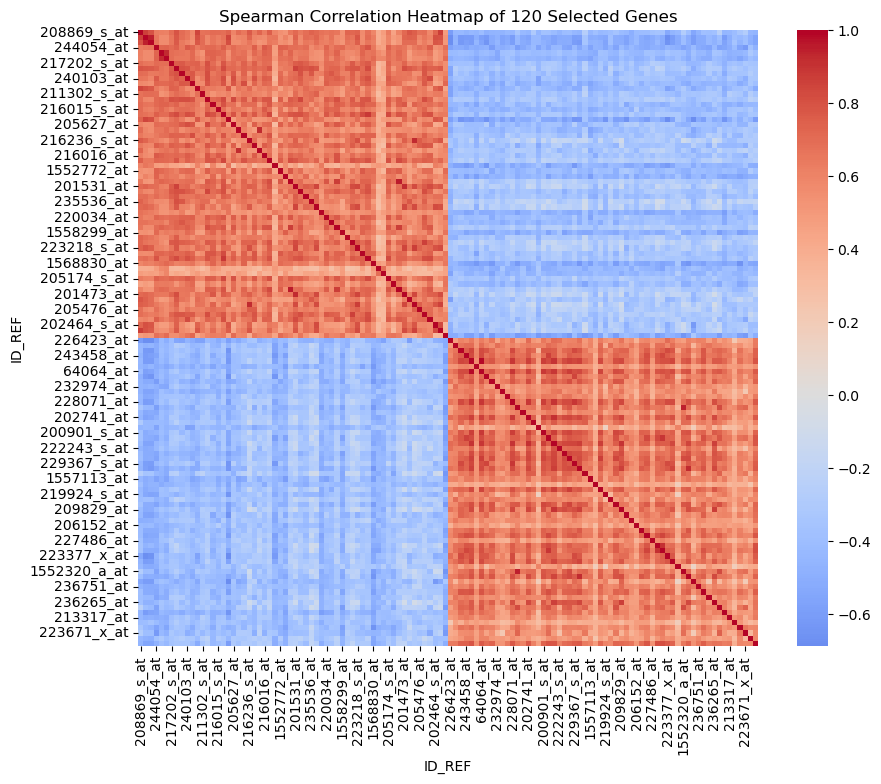

In [ ]:
spearman_corr_matrix = cleaned_df.loc[D_most_significant_genes].T.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_matrix, cmap='coolwarm', center=0)
plt.title("Spearman Correlation Heatmap of 120 Selected Genes")
plt.show()

2) What can you report about co-expression of genes in D (coexpression
is inferred from the correlation of the expression
levels of genes, across a set of samples)? Do we observe
any significant co-expression? If so how many pairs, etc.


__Anwer__


From the heatmap, its clear that the 60 most significantly overexpressed genes in 'M' labeld samples are highly correlated with each other, the 60 most significantly underexpressed genes in 'M' labled samples are highly correlated with each other, and the two groups have a negative correlation. This should not surprise us, as correlation shows the tendancy of two random variables to go up and down together.

3) What would have been advantages and disadvantages of
computing co-expression for all genes in the study rather
than only for genes in D?


__Answer__

To compute the co-expression of all 54K genes would take significantly longer, though it would give a more detailed picture of gene expression co-expression in samples. When studying gene DE between Diseased Samples and Healthy Samples, genes that show no significant difference in expression might be less of interest than genes that have a strong DE. It is important to remember that the presented genes are only the most significantly differently expressed, and that there are many other genes that might show softer correlations. Including those genes too might give a less dichotomic image. 

4) Provide example datapoints matching the following
descriptions. Each example should be constructed over
n=50 datapoints. Provide a table
description of the example data as well as
a jointplot (see figure).

a) Data with
Pearson(x,y) > Spearman(x,y) + 1.2

b) Data with negative Kendall(x,y) and
positive Spearman(x,y) (or vice
versa)


False


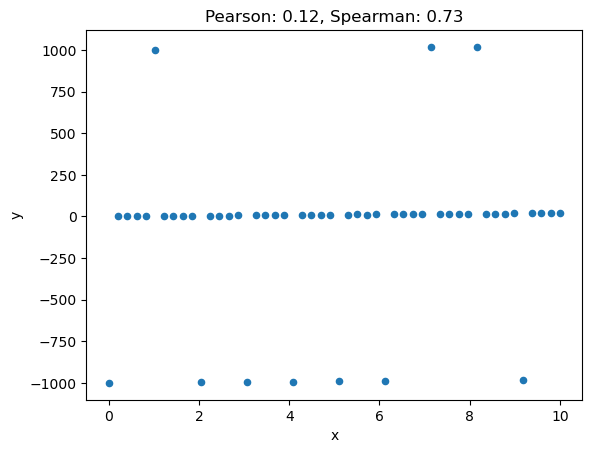

In [ ]:
from scipy.stats import pearsonr, spearmanr, kendalltau

# np.random.seed(0)
n = 50 
num_outliers = 10


x_a = np.linspace(0, 10, n)
y_a = 2 * x_a + np.random.normal(0, 1, n)
y_a[::n//num_outliers] += np.random.choice([-1000, 1000], size=num_outliers)

pearson_corr_a, _ = pearsonr(x_a, y_a)
spearman_corr_a, _ = spearmanr(x_a, y_a)
pearson_spearman_gap = pearson_corr_a > spearman_corr_a + 1.2
pearson_spearman_gap

df_a = pd.DataFrame({'x': x_a, 'y': y_a})
df_a.plot.scatter(x='x', y='y')
plt.title(f"Pearson: {pearson_corr_a:.2f}, Spearman: {spearman_corr_a:.2f}")
print(pearson_spearman_gap)
plt.show()




5) Can you find 2 pairs of genes that fulfill the
conditions in section 4.a and 4.b?

e. Plots and Conclusions of the DE and correlation analysis



1) Construct the DE overabundance plots (blue and green
lines as shown in class) for M vs H overexpression (higher
expression levels in M) using WRS and t-test using the
results you had computed in Section 3c.
State, for each comparison, the number of genes, k, at
which we observe:

    a) FDR = 0.1

    b) FDR = 0.05

    c) FDR = 0.001

    If these events are not observed at any k, then make that
statement.


In [ ]:
p_values

,p_ttest_disease_greater,p_ttest_healthy_greater,p_wilcoxon_disease_greater,p_wilcoxon_healthy_greater
ID_REF,,,,
1007_s_at,1.0,0.101647,0.847386,0.154271
1053_at,0.32827,1.0,0.141349,0.860213
117_at,0.000061,1.0,0.000009,0.999991
121_at,0.459158,1.0,0.265536,0.736753
1255_g_at,0.315548,1.0,0.150969,0.850664
...,...,...,...,...
AFFX-ThrX-5_at,0.134842,1.0,0.011363,0.988844
AFFX-ThrX-M_at,0.169109,1.0,0.013867,0.986379
AFFX-TrpnX-3_at,0.147671,1.0,0.058071,0.942737


FDR: 0.1, Number of significant genes: 3871
FDR: 0.05, Number of significant genes: 2784
FDR: 0.001, Number of significant genes: 903


Text(0.5, 1.0, 'Overabundance plot of WRS p-values')

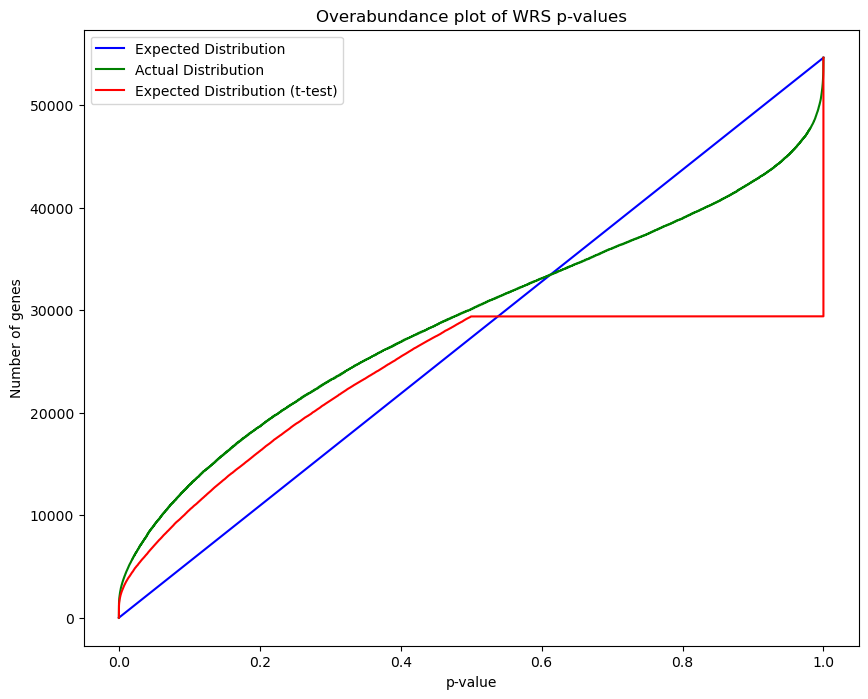

In [ ]:
import statsmodels.stats.multitest as mt

FDRs = [0.1, 0.05, 0.001]



p_val_overexpressed_WRS_sorted = p_values.loc[:, "p_wilcoxon_disease_greater"].sort_values()
p_val_overexpressed_ttest_sorted = p_values.loc[:, "p_ttest_disease_greater"].sort_values()
n_genes = p_values.shape[0]

for fdr in FDRs:
    rejected, _ = mt.fdrcorrection(p_values['p_wilcoxon_disease_greater'], alpha=fdr)
    print(f"FDR: {fdr}, Number of significant genes: {rejected.sum()}")


actual = np.arange(1, n_genes + 1)
expected_WRS = p_val_overexpressed_WRS_sorted * n_genes
expected_ttest = p_val_overexpressed_ttest_sorted * n_genes

plt.figure(figsize=(10, 8))
plt.plot(p_val_overexpressed_WRS_sorted, expected_WRS, 'b-', label='Expected Distribution')
plt.plot(p_val_overexpressed_WRS_sorted, actual, 'g-', label='Actual Distribution')
plt.plot(p_val_overexpressed_ttest_sorted, actual, 'r-', label='Expected Distribution (t-test)')
plt.legend()
plt.plot()
plt.xlabel('p-value')
plt.ylabel('Number of genes')
plt.title('Overabundance plot of WRS p-values')



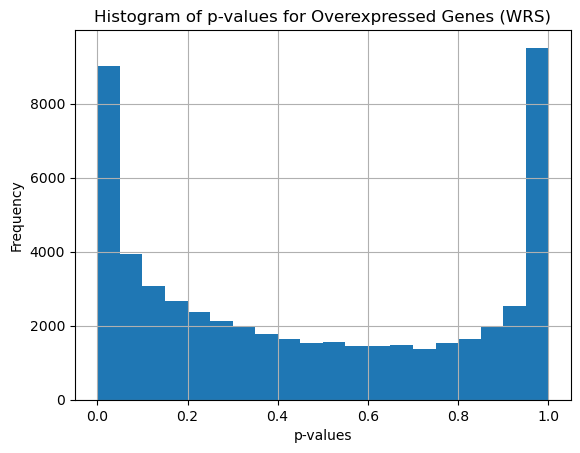

In [46]:
# genes_overexpressed_in_disease_wilcoxon
# genes_overexpressed_in_disease_ttest
# genes_underexpressed_in_disease_wilcoxon
# genes_underexpressed_in_disease_ttest 

p_values.head()
p_val_overexpressed_WRS = p_values.loc[:, "p_wilcoxon_disease_greater"]
p_val_overexpressed_ttest = p_values.loc[genes_overexpressed_in_disease_ttest, "p_ttest_disease_greater"]
p_val_overexpressed_ttest

p_val_overexpressed_WRS.hist(bins=20)

plt.xlabel('p-values')
plt.ylabel('Frequency')
plt.title('Histogram of p-values for Overexpressed Genes (WRS)')
plt.show()


2) What can you say about the difference in results obtained
in WRS vs those obtained by Student t-test?


3) Select any 3 differentially expressed genes, from D (which
was defined in 3d), and produce a graphical representation
of their expression patterns that demonstrates the observed
DE.


4) Heatmap
Draw a heatmap representation of the expression values of
the genes in D (from 3d), across the entire cohort (all
samples). Order the genes and the samples to produce the
maximal visual effect.